# Python Cheat Sheet

- [Increase Width of Jupyter Code Cell](#Increase-Width-of-Code-Cell) 
- [Data](#Data)
- [Plot ROC](#Plot-Receiver-Operating-Characeteristic-(ROC)-Curve)
- [Linear Regression](#Linear-Regression)
    - [Simple Regression](#Simple-Linear-Regression-on-MEDV-~-LSTAT)
    - [Multuple Regression](#Multiple-Linear-Regression-on-MEDV-~-.)
    - [Interaction Terms](#Interaction-Terms)
    - [Categorical Variables](#Categorical-Variables)

# Increase Width of Code Cell


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Libraries

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
import pandas as pd
import numpy as np

# Data

In [3]:
iris = datasets.load_iris()
boston = datasets.load_boston()
guerry = sm.datasets.get_rdataset("Guerry", "HistData") #'Data from A.-M. Guerry, "Essay on the Moral Statistics of France"'

## Iris Dataset

In [4]:
iris_data_df = pd.DataFrame(iris['data'], columns=iris["feature_names"])
iris_target_df = pd.DataFrame(iris['target'],columns=["target"])

In [5]:
iris_df = iris_data_df.join(iris_target_df)

In [6]:
import qgrid
qgrid.show_grid(iris_df.head(), grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Boston Dataset

In [7]:
boston_data_df = pd.DataFrame(boston['data'], columns=boston["feature_names"])
boston_target_df = pd.DataFrame(boston['target'],columns=["MEDV"])

In [8]:
boston_df = boston_data_df.join(boston_target_df)

## Guerry Dataset
Data from A.-M. Guerry, "Essay on the Moral Statistics of France
- mixed of continous and categorical variables

In [9]:
guerry_df = guerry.data

# Dataframe Descriptive

In [10]:
#Boston
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#Gueey
guerry_df.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


# Plot Receiver Operating Characeteristic (ROC) Curve

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [13]:
#Given False Positive and True Positive Rate
#3 Decimal place
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='darkorange', label='ROC (AUC: {:.{}f})'.format(auc(fper, tper),3))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Categorical Plot

In [14]:
import seaborn as sns

## Grid Plot

In [90]:
guerry_df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


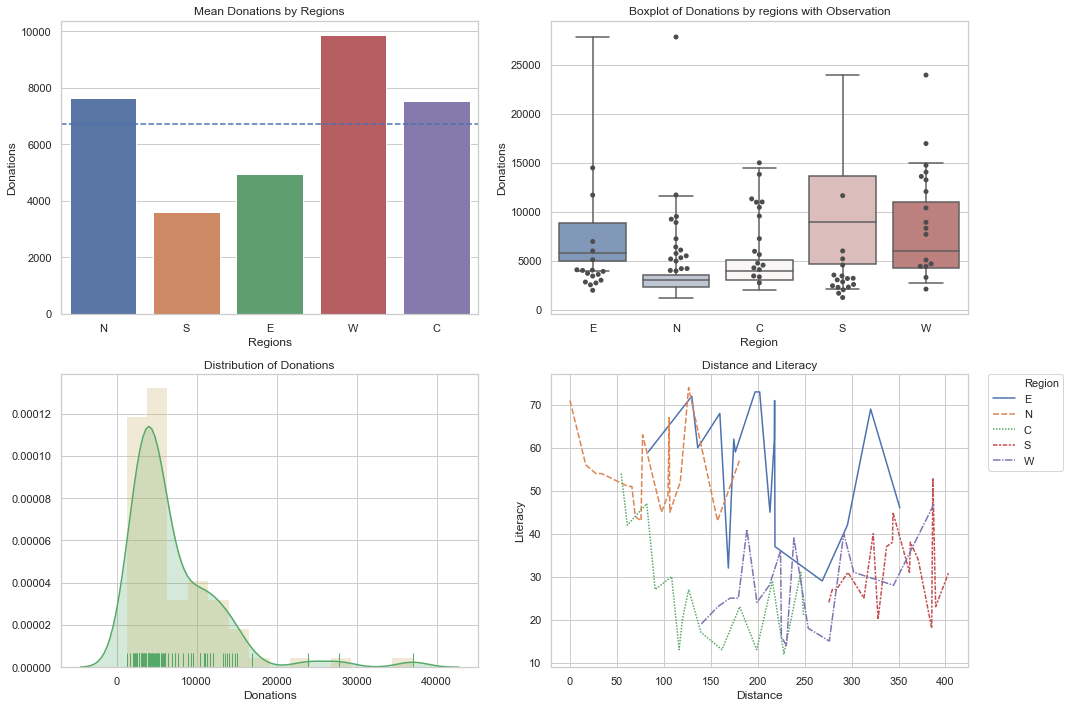

In [97]:
sns.set(style="whitegrid")
f, axes = plt.subplots(2, 2, figsize=(15, 10))

order_region = ['N', 'S', 'E', 'W', 'C']

#Mean donation per region
mean_donation_per_region = pd.DataFrame(guerry_df.groupby(by=['Region'])['Donations'].mean().reset_index())
g = sns.barplot(x='Region', y= 'Donations', data = mean_donation_per_region, order = order_region, ax=axes[0,0])
axes[0,0].axhline(mean_donation_per_region['Donations'].mean(), ls ='--')
axes[0,0].set(title = 'Mean Donations by Regions', xlabel='Regions', ylabel = 'Donations')

#Box plot of donations
g = sns.boxplot(x="Region", y="Donations", data=guerry_df, whis="range", palette="vlag", order = order_region, ax=axes[0,1])
g = sns.swarmplot(x="Region", y='Donations', data=guerry_df, size=5, color=".3", linewidth=0, ax=axes[0,1])
axes[0,1].set(title="Boxplot of Donations by regions with Observation")

#Distribution plot of donations
g = sns.distplot(guerry_df['Donations'], rug=True, color="g",
                 kde_kws={"shade": True},
                 hist_kws={"histtype": "stepfilled", "linewidth": 0.3, "alpha": 0.3, "color": "y"},
                 ax=axes[1, 0])
axes[1,0].set(title="Distribution of Donations")


#Distance and Literacy
g = sns.lineplot(x="Distance", y="Literacy", hue="Region", style='Region', data=guerry_df, ax=axes[1,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Put the legend out of the figure
axes[1,1].set(title="Distance and Literacy")


plt.tight_layout()

In [47]:
guerry_df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


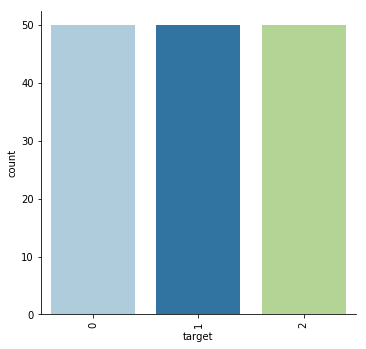

In [15]:
order = [0,1,2]
sns.catplot(x="target", kind="count",
            data=iris_df, order=order,
            palette="Paired").set_xticklabels(rotation=90)

# Browse OS
- Outputs a list of file in current directory that is of type [specified]

In [16]:
import os
from os import listdir
from os.path import isfile, join

#Find CSV
mypath = os.getcwd().replace("\\","/") 
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f))) & f.endswith(".csv")]

# Joining 2 Dataframes
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html  

``` python
pd.concat([df1, df1])
```

# Linear Regression
- Boston Dataset (boston_df)

In [17]:
import statsmodels.api as sm
import numpy as np

## Simple Linear Regression on MEDV ~ LSTAT 

In [18]:
predictor = ['LSTAT']

In [19]:
Y = boston_df['MEDV']
X = boston_df[predictor]

In [20]:
X = sm.add_constant(X.values)
X = pd.DataFrame(X, columns= ['Intercept'] + predictor) #insert column names

In [21]:
model = sm.OLS(Y,X)
results = model.fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        12:17:41   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Obtain Coefficient

In [23]:
results.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

### Obtain Confidence Interval of Coefficient 

In [24]:
results.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


### Obtain Predictions of New Observations
 - Given new observation 5, 10, 15

In [25]:
results.predict(sm.add_constant(np.array([5,10,15])))

array([29.80359411, 25.05334734, 20.30310057])

### Obtain Confidence and Prediction Intervals for Prediction
- Prediction Intervals are always wider than confidence Intevals
- Prediction Intervals incorporates both reducible error in the estimation of unknown f(x) as well as the irreducible  
  in how much an individual point will differ from the population regression plane
- Prediction intervals are for individual obersations, whearas confidence intervals are for average response

In [26]:
results.get_prediction(sm.add_constant(np.array([5,10,15]))).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


## Multiple Linear Regression on MEDV ~ . 

In [27]:
import statsmodels.api as sm
import numpy as np

In [28]:
Y = boston_df['MEDV']

In [29]:
X = sm.add_constant(boston_df.iloc[:,:-1].values)
X = pd.DataFrame(X, columns= ["Intercept"] + list(boston_df.columns)[:-1]) #insert column names

In [30]:
model = sm.OLS(Y,X)
results = model.fit()

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          6.72e-135
Time:                        12:17:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

## R-style formula
click [here](https://www.statsmodels.org/stable/index.html) to read more about statmodel's R-Style usecase

- Handles Interaction Terms
- Categorical Variables

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [44]:
guerry_df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [36]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=guerry_df).fit()

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.90e-08
Time:                        12:17:44   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

### Interaction Terms
- “:” adds a new column to the design matrix with the product of the other two columns.
- “*” will also include the individual columns that were multiplied together 

In [38]:
result = smf.ols(formula='Lottery ~ Literacy : Wealth', data=guerry_df).fit()

In [39]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.341
Date:                Thu, 23 Apr 2020   Prob (F-statistic):              0.130
Time:                        12:17:44   Log-Likelihood:                -397.06
No. Observations:                  86   AIC:                             798.1
Df Residuals:                      84   BIC:                             803.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.1857      4.382     

In [40]:
result = smf.ols(formula='Lottery ~ Literacy * Wealth', data=guerry_df).fit()

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           3.33e-06
Time:                        12:17:45   Log-Likelihood:                -383.56
No. Observations:                  86   AIC:                             775.1
Df Residuals:                      82   BIC:                             784.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.8437     16.190     

### Categorical Variables
We can use the function C() to to indicate that the variable is a categorical variable
 - e.g. Setting Region as categorical variable

In [42]:
result = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=guerry_df).fit()

In [43]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.07e-05
Time:                        12:17:45   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.